# Линейная алгебра: сходство текстов и аппроксимация функций

In [79]:
# Задача 1: сравнение предложений

In [15]:
catsFile = open('7-11.sentences.txt', 'r')

In [16]:
catsText = catsFile.read().lower().split('\n')

In [17]:
catsText

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

In [53]:
catsToken = [] # Строки с разделением на слова
wordDic =  dict() # Словарь частот вхождения слов
import re
for sent in catsText:
    tmpStr = re.split('[^a-z]', sent) # Разбиваем на слова, без символов
    #strKey = [key for key in tmp if key] # Очичаем массив от пустых элементов
    strKey = []
    for key in tmpStr:
        if key: 
            strKey.append(key)
            wordDic.setdefault(key) # Формируем словарь
    catsToken.append(strKey)
#catsToken 

In [54]:
index = 0
for key in wordDic: # Проставляем индекс у каждого слова
    wordDic[key] = index
    index += 1

#wordDic   

In [63]:
import numpy as np

(22L, 254L)

In [77]:
wordInclude = np.zeros((len(catsText),len(wordDic))) # Массив размерностью строк и числа встреченных слов
wordInclude.shape
sentInd = 0
for sent in catsToken:    
    for word in sent:
        wordInclude[sentInd][wordDic[word]] += 1
    sentInd += 1


In [78]:
# Находим косинусное расстояние от первой строки
import scipy.spatial
dists = []
for row in wordInclude:
    dists.append(scipy.spatial.distance.cosine(wordInclude[0,:], row))
dists 

[0.0,
 0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.8842724875284311,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.956644501523794,
 0.9442721787424647,
 0.8885443574849294,
 0.8427572744917122,
 0.8250364469440588]

In [132]:
i = 0
min1 = 1
min2 = 1
i1 = 0
i2 = 0
for value in dists: # Ищем минимальных два индекса, ближайших и их значнеия
    if (value != 0.) & (value < min1):
        min2 = min1
        min1 = value
        i2 = i1
        i1 = i
    i +=1
print i1, min1, i2, min2

6 0.7327387580875756 4 0.7770887149698589


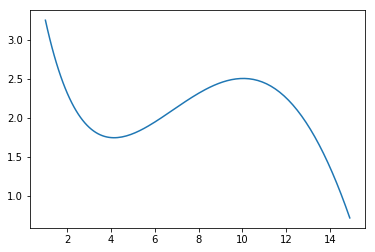

In [143]:
# Задача 2. Аппроксимация функции
%matplotlib inline
from matplotlib import pylab as plt
# Рассмотрим сложную математическую функцию на отрезке [1, 15]:
# f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
import math
def f(x):
    x = float(x)
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)
x = np.arange(1,15,0.1)
plt.plot(x,[f(v) for v in x])
plt.show()

In [244]:
# Многочлен первого порядка для  1 и 15
# w0 + w1 * 1
# w0 + w1 * 15
def matrix(x):
    res = []
    for w in x:
        i = 0
        equal = []
        while i < len(x):
            equal.append(1 * w ** i)
            i += 1        
        res.append(equal)
    return np.array(res)
    

In [231]:
# Точки
x1 = np.array([1,15])
# Многчлен
A1 = matrix(x1)
print 'Многочлен\n', A1
# вектор результатов
b1 = np.array([f(1), f(15)])
print 'Вектор результатов', b1
w1 = np.linalg.solve(A1, b1)
print 'Вектор решения', w1

Многочлен
[[ 1  1]
 [ 1 15]]
Вектор результатов [3.25221687 0.63522142]
Вектор решения [ 3.43914511 -0.18692825]


In [232]:
# Рекусивная функция вычисления значения матричного линейного уравнения
# w - матрица
# x - значение для которого осуществляется вычисление
# i - итерация, 0 по умолчанию

def matrixLinearEquation(w,x,i=0): 
    res = w[i] * x ** i
    i += 1
    if(i < len(w)):
        res += matrixLinearEquation(w,x,i)
    return res 

print 'Сопоставляем результаты w1[0] + w1[1] * x = f(x), для x=1', round(matrixLinearEquation(w1,1),4), round(f(1),4)
print 'Сопоставляем результаты w1[0] + w1[1] * x = f(x), для x=15', round(matrixLinearEquation(w1,15),4),  round(f(15),4)

Сопоставляем результаты w1[0] + w1[1] * x = f(x), для x=1 3.2522 3.2522
Сопоставляем результаты w1[0] + w1[1] * x = f(x), для x=15 0.6352 0.6352


In [245]:
# Рисуем матрицу для значений 1-15,
# с функцией расчета многочлена matrixLinearEquation, 
# f(x) и массивом x для контрольного расчета
# w - матрица

def plot1_15 (w):   # Матрица w
    x_1 = np.arange(1,15,0.1) 
    plt.plot(x_1,[matrixLinearEquation(w,v) for v in x_1],'-r', label='matrix')
    plt.plot(x_1,[f(v) for v in x_1],'-b', label='f(x)')
    plt.show()

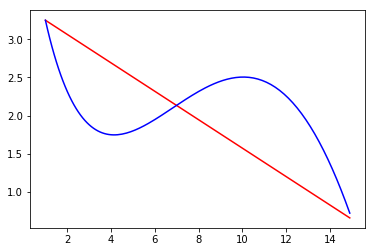

In [246]:
 plot1_15 (w1)# Проверяем

Многочлен w2[0] + w2[1] * x +  w2[2] * x **2
[[  1   1   1]
 [  1   8  64]
 [  1  15 225]] для [1, 8, 15]
Вектор результатов [3.25221687 2.31617016 0.63522142] для [1, 8, 15]
Вектор решения [ 3.32512949 -0.06531159 -0.00760104]
Сопоставляем результаты многчлена и f(x), для x=1 3.2522 3.2522
Сопоставляем результаты многчлена и f(x), для x=8 2.3162 2.3162
Сопоставляем результаты многчлена и f(x), для x=15 0.6352 0.6352


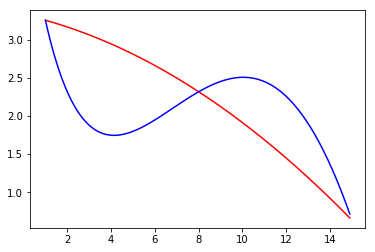

In [251]:
# Многчлен 1,8,15
x2 = [1,8,15]
# Многчлен
A2 = matrix(x2)
print 'Многочлен w2[0] + w2[1] * x +  w2[2] * x **2'
print A2, 'для', x2
# вектор результатов
b2= np.array([f(x) for x in x2])
print 'Вектор результатов',  b2,'для', x2
w2 = np.linalg.solve(A2, b2)
print 'Вектор решения', w2
print 'Сопоставляем результаты многчлена и f(x), для x=1', round(matrixLinearEquation(w2,1),4), round(f(1),4)
print 'Сопоставляем результаты многчлена и f(x), для x=8', round(matrixLinearEquation(w2,8),4), round(f(8),4)
print 'Сопоставляем результаты многчлена и f(x), для x=15', round(matrixLinearEquation(w2,15),4),  round(f(15),4)
plot1_15 (w2)# Проверяем

Многочлен w3[0] + w3[1] * x +  w3[2] * x **2 + w3[3] * x ** 3
[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]] для [1, 4, 10, 15]
Вектор результатов [3.25221687 1.74684595 2.50541641 0.63522142] для [1, 4, 10, 15]
Вектор решения [ 4.36264154 -1.29552587  0.19333685 -0.00823565]
Сопоставляем результаты многчлена и f(x), для x=1 3.25 3.25
Сопоставляем результаты многчлена и f(x), для x=4 1.75 1.75
Сопоставляем результаты многчлена и f(x), для x=10 2.51 2.51
Сопоставляем результаты многчлена и f(x), для x=15 0.64 0.64


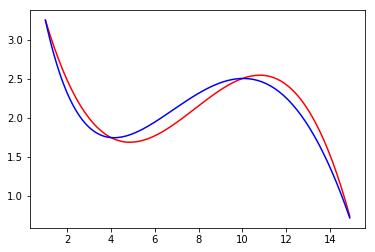

In [254]:
# Многчлен 1,4,10,15
x3 = [1,4,10,15]
# Многчлен
A3 = matrix(x3)
print 'Многочлен w3[0] + w3[1] * x +  w3[2] * x **2 + w3[3] * x ** 3'
print A3, 'для', x3
# вектор результатов
b3= np.array([f(x) for x in x3])
print 'Вектор результатов',  b3,'для', x3
w3 = np.linalg.solve(A3, b3)
print 'Вектор решения', w3
print 'Сопоставляем результаты многчлена и f(x), для x=1', round(matrixLinearEquation(w3,1),2), round(f(1),2)
print 'Сопоставляем результаты многчлена и f(x), для x=4', round(matrixLinearEquation(w3,4),2), round(f(4),2)
print 'Сопоставляем результаты многчлена и f(x), для x=10', round(matrixLinearEquation(w3,10),2), round(f(10),2)
print 'Сопоставляем результаты многчлена и f(x), для x=15', round(matrixLinearEquation(w3,15),2),  round(f(15),2)
plot1_15 (w3)# Проверяем